## Installing PyTorch

    conda install -c pytorch pytorch
    conda install -c pytorch torchvision

In [1]:
conda install -c pytorch pytorch

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pytorch


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38hecd8cb5_0         2.9 MB
    libuv-1.40.0               |       haf1e3a3_0         334 KB
    ninja-1.10.2               |   py38hf7b0b51_0         101 KB
    pytorch-1.7.0              |          py3.8_0        63.5 MB  pytorch
    ------------------------------------------------------------
                                           Total:        66.8 MB

The following NEW packages will be INSTALLED:

  libuv              pkgs/main/osx-64::libuv-1.40.0-haf1e3a3_0
  ninja              pkgs/main/osx-64::ninja-1.10.2-py38hf7b0b51_0
  pytorch            pytorch/osx-64::pytorch-1.7.0-py3.8_0

The following packages will be UPDATED:

  conda              conda-forge::conda-4.8.5-py38

In [2]:
conda install -c pytorch torchvision

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    torchvision-0.8.1          |         py38_cpu         6.5 MB  pytorch
    ------------------------------------------------------------
                                           Total:         6.5 MB

The following NEW packages will be INSTALLED:

  torchvision        pytorch/osx-64::torchvision-0.8.1-py38_cpu



torchvision-0.8.1    | 6.5 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


# Topics

## 1. Convolutional Neural Net
## 2. New Conecpts
   - ## Tensors 
   - ## Training Batch
   
## 3. PyTorch

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

## 1. Convolutional Neural Net

## 2. New Conecpts
   
   - ## Tensors: multidimensional matrices
   
   - ## Training Batch: typically in integer powers of 2

## 3 Trying PyTorch

    https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

## CFAR10

In [2]:
from IPython.display import IFrame
IFrame('https://www.cs.toronto.edu/~kriz/cifar.html', width=700, height=350)

In [3]:
'''
Image data will be downloaded the first time this code is run

'''

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
'''
A generator (covered in PHYS 301) is used to retrieve images 

This is a good idea because you do NOT want to load the entire dataset at once.

There are 6000 images per class, so a total of 60,000 images, each with with R, G, B channels
'''
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [5]:
# A batch of 4 image
images.shape

torch.Size([4, 3, 32, 32])

In [15]:
### each image has three channels -- R, G, B
img = images[3]
img.shape, img[0].shape

(torch.Size([3, 32, 32]), torch.Size([32, 32]))

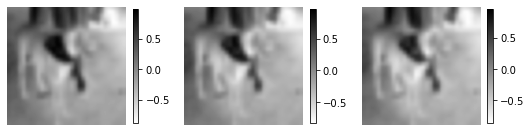

In [16]:
'''
Show RGB channels
'''
fig, (axR, axG, axB) = plt.subplots(1, 3, figsize=(9, 3),)
imR = axR.imshow(img[0], interpolation='gaussian', cmap=plt.cm.gray_r)
axR.axis('off')
plt.colorbar(imR, ax=axR, shrink=0.7)

imG = axG.imshow(img[1], interpolation='gaussian', cmap=plt.cm.gray_r)
axG.axis('off')
plt.colorbar(imG, ax=axG, shrink=0.7)

imB = axB.imshow(img[2], interpolation='gaussian', cmap=plt.cm.gray_r)
axB.axis('off')
plt.colorbar(imB, ax=axB, shrink=0.7)

plt.show()

In [17]:
print(type(img[0]))
img[0].max(), img[0].min(), img[1].max(), img[1].min(), img[2].max(), img[2].min()

<class 'torch.Tensor'>


(tensor(0.9922),
 tensor(-0.8745),
 tensor(0.9686),
 tensor(-0.8196),
 tensor(0.9686),
 tensor(-0.8588))

Now everthing's  positive, to make imshow happy when displaying a RGB image
tensor(0.9961) tensor(0.0627) tensor(0.9843) tensor(0.0902) tensor(0.9843) tensor(0.0706)
<class 'numpy.ndarray'>


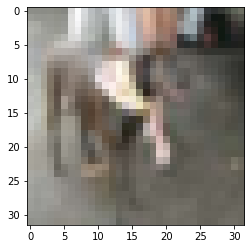

In [19]:
# img = images[2]
img = images[3] / 2 + 0.5 # scales the color a little differently
print("Now everthing's  positive, to make imshow happy when displaying a RGB image")
print(img[0].max(), img[0].min(), img[1].max(), img[1].min(), img[2].max(), img[2].min())

# turning tensor into numpy array
npimg = img.numpy()
print(type(npimg))

# need to swap: for numpy, the channel number comes last; and for tensor, it comes first 
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

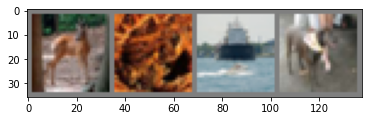

deer frog ship dog


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
# A generator is used -- this is covered in PHYS 301
# you will always get the *next* four images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('{:s}'.format(classes[labels[j]]) for j in range(4)))

In [21]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    '''
    This a variation of LeNet
    
    when you define a class with argument, that argument is called superclass (covered in PHYS 301)
    You "inherit" all the methods and attributes of the superclass 
    but you can make modifications, which is what happens below
    '''
    def __init__(self):
        super(Net, self).__init__()
        
        # in_channels, out_channels, kernel_size
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # fc layer going from 16x5x5 = 160 neurons to 120 neurons
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        
        # fc layer going from 16x5x5 = 120 neurons to 84 neurons
        self.fc2 = nn.Linear(120, 84)
        
        # fc layer going from 16x5x5 = 84 neurons to 10 neurons, for the 10 classes
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5) # collapsing 16 channels of 5x5 feature maps to a 1d array
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [22]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

# note: we didn't define the parameters method for the Net class -- it's inherited
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [23]:
for epoch in range(1):  # loop over the dataset multiple times to get a sense of the average performance of the CNN

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients -- initializing
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        # the step() method updates the weights
        # https://pytorch.org/docs/stable/optim.html
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[{:5d}, {:5d}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[    1,  2000] loss: 2.190
[    1,  4000] loss: 1.849
[    1,  6000] loss: 1.681
[    1,  8000] loss: 1.591
[    1, 10000] loss: 1.508
[    1, 12000] loss: 1.468
Finished Training


In [26]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

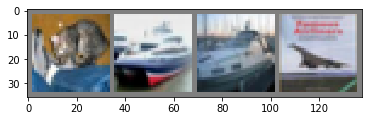

Ground Truth (label):cat ship ship plane


In [27]:
'''
See how the trained cnn is doing on four test images
'''

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('Ground Truth (label):' + ' '.join('{:s}'.format(classes[labels[j]]) for j in range(4)))

In [163]:
'''
Load the saved trained cnn
'''

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [164]:
outputs = net(images)

In [165]:
'''
When you see the results, you may go, hmmm, not too great
'''

_, predicted = torch.max(outputs, 1)
print('Predicted:' + ' '.join('{:s}'.format(classes[predicted[j]]) for j in range(4)))


Predicted:cat car truck ship


In [171]:
type(outputs)

# convert to numpy if that makes you feel more comfortable
npout = outputs.detach().numpy()

print(outputs.shape)
print(npout.shape)

torch.Size([4, 10])
(4, 10)


In [172]:
print(npout)

[[-1.195173   -2.2658305   0.78528416  2.7261515  -0.56703615  1.1249359
   1.4122614  -1.0726619  -0.20779964 -1.6027749 ]
 [ 3.5485127   6.370166   -1.5249791  -3.1418295  -3.7596517  -4.963513
  -4.4343686  -4.51335     5.6142926   5.791031  ]
 [ 2.1574922   3.5953188  -0.84919864 -1.9370373  -2.3063293  -3.2446566
  -3.1224046  -2.5018697   3.2027667   3.766808  ]
 [ 1.9988744   2.8053763  -0.13249676 -1.5906781  -2.101745   -2.908719
  -2.2836292  -2.1359756   3.743497    2.3002355 ]]


In [173]:
print(outputs)

tensor([[-1.1952, -2.2658,  0.7853,  2.7262, -0.5670,  1.1249,  1.4123, -1.0727,
         -0.2078, -1.6028],
        [ 3.5485,  6.3702, -1.5250, -3.1418, -3.7597, -4.9635, -4.4344, -4.5134,
          5.6143,  5.7910],
        [ 2.1575,  3.5953, -0.8492, -1.9370, -2.3063, -3.2447, -3.1224, -2.5019,
          3.2028,  3.7668],
        [ 1.9989,  2.8054, -0.1325, -1.5907, -2.1017, -2.9087, -2.2836, -2.1360,
          3.7435,  2.3002]], grad_fn=<AddmmBackward>)


In [176]:
_, predicted = torch.max(outputs.data, 1)
predicted

tensor([3, 1, 9, 8])

In [25]:
'''
Let's look at 10000 test images 
'''

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the 10000 test images: {:.2f} %%'.format(100 * correct / total))

Accuracy of the 10000 test images: 52.14 %%


In [24]:
'''
Let's look at how each class is doing
'''

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of {:5s} : {:5.2f} %%'.format(classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 43.70 %%
Accuracy of car   : 64.60 %%
Accuracy of bird  : 52.50 %%
Accuracy of cat   : 50.00 %%
Accuracy of deer  : 31.40 %%
Accuracy of dog   : 17.80 %%
Accuracy of frog  : 58.60 %%
Accuracy of horse : 68.70 %%
Accuracy of ship  : 55.20 %%
Accuracy of truck : 78.90 %%


## Recurrent Neural Net and NLP

     https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html

## RNN and CNN for Gomuko:

http://cs231n.stanford.edu/reports/2016/pdfs/109_Report.pdf

## CNN for Go

http://proceedings.mlr.press/v37/clark15.pdf

# End of Week 15-2